In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openturns as ot
from dependence import ConservativeEstimate
from dependence.dependence import VineCopula

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [232]:
dim = 5
copula = 3
n = 10000
families = np.tril(np.ones((dim, dim), dtype=int)*copula, k=-1)
margins = [ot.Uniform(0, 1)]*dim
quant_estimate = ConservativeEstimate(lambda x: None, margins, families=families)

In [233]:
structure = quant_estimate.vine_structure
true_params = np.tril(np.ones((dim, dim))*4, k=-1)
vine_copula = VineCopula(structure, families, true_params)
true_data = vine_copula.get_sample(n)

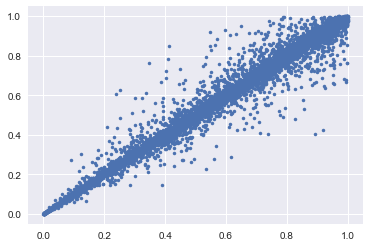

In [234]:
plt.plot(true_data[:, 0], true_data[:, 1], '.')

In [235]:
def test_like_func(x, param):
    """
    """
    vine_copula = VineCopula(structure, families, param)
    return vine_copula.loglikelihood(x)

In [236]:
from dependence.utils import get_grid_sample, to_copula_params, list_to_matrix
quant_estimate = ConservativeEstimate(lambda x: None, margins, families=families)
quant_estimate

In [237]:
K = 100
kendalls = np.asarray(get_grid_sample(quant_estimate._bounds_tau_list, K, 'lhs'))
converter = [quant_estimate._copula_converters[k] for k in quant_estimate._pair_ids]
params = to_copula_params(converter, kendalls)

In [238]:
output_samples = np.zeros((n, K))
for i, param in enumerate(params):
    output_samples[:, i] = test_like_func(true_data, list_to_matrix(param, dim))

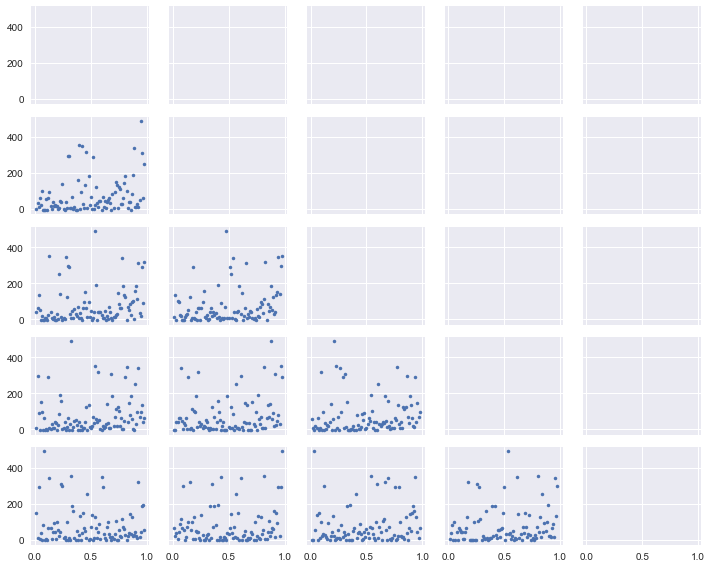

In [239]:
fig, axes = plt.subplots(dim, dim, figsize=(10, 8), sharex=True, sharey=True)

quantities = - np.mean(output_samples, axis=0)
k = 0
for i in range(1, dim):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(kendalls[:, k], quantities, '.')
        k += 1
        
fig.tight_layout()

In [240]:
params[quantities.argmin()], quantities.min()

(array([ 1.19361277,  0.113383  ,  0.07092933,  1.34924223,  1.77893245,
         1.29570734,  1.40454507,  3.79794173,  1.71091938,  2.07788765]),
 -3.965755599011167)